# Use Pytesserac to exclude NOM, PRENOM from the images

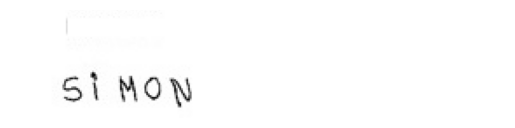

In [21]:
import pytesseract
from PIL import Image, ImageDraw
import re
import matplotlib.pyplot as plt
 

# Function to clean the extracted text
def clean_text(text):
    words = text.split()
    cleaned_words = [word for word in words if not re.match(r'^(N|n)(OM|om)?(:)?|^(P|p)(RENOM|renom)?(:)?', word)]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

# Path to your single image file
image_path = './Handwriting_Dataset/train_v2/train/TRAIN_00002.jpg'

# Open the image using Pillow
image = Image.open(image_path)

# Use pytesseract to extract text and bounding boxes from the image
extracted_data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

# Initialize a drawing context on the image
draw = ImageDraw.Draw(image)

# Define a regex pattern for unwanted text
unwanted_pattern = r'^(N|n)(OM|om)?(:)?|^(P|p)(RENOM|renom)?(:)?'

# Loop through the identified text and erase the unwanted parts
for i, word_text in enumerate(extracted_data['text']):
    if re.match(unwanted_pattern, word_text):
        left = extracted_data['left'][i]
        top = extracted_data['top'][i]
        width = extracted_data['width'][i]
        height = extracted_data['height'][i]

        # Draw a white rectangle to "erase" the unwanted text
        draw.rectangle([left, top, left + width, top + height], fill='white')

# Clean the extracted text from the modified image
extracted_text = pytesseract.image_to_string(image, config='--psm 6')

# Clean the extracted text using the clean_text function
cleaned_text = clean_text(extracted_text)

# Print the results
# print(f'Original Text:\n{extracted_text}\n')
# print(f'Cleaned Text:\n{cleaned_text}')

# # Save the modified image
# image.save('modified_image.jpg')

# Display the modified image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Print the image names for the images that have NOM, PRENOM and it is recognized by Pytesserac

In [22]:
import os
import pytesseract
from PIL import Image, ImageDraw

# Function to clean the extracted text
def clean_text(text):
    words = text.split()
    cleaned_words = [word for word in words if word not in ['NOM', 'PRENOM', 'NOM:', 'PRENOM:']]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

# Function to process each image
def process_image(image_path):
    # Open the image using Pillow
    image = Image.open(image_path)

    # Use pytesseract to extract text and bounding boxes from the image
    extracted_data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

    # Initialize a drawing context on the image
    draw = ImageDraw.Draw(image)

    # Define a list of unwanted text
    unwanted_text = ['NOM', 'PRENOM', 'NOM:', 'PRENOM:']

    found_unwanted_text = False

    # Loop through the identified text and erase the unwanted parts
    for i, word_text in enumerate(extracted_data['text']):
        if word_text in unwanted_text:
            left = extracted_data['left'][i]
            top = extracted_data['top'][i]
            width = extracted_data['width'][i]
            height = extracted_data['height'][i]

            # Draw a white rectangle to "erase" the unwanted text
            draw.rectangle([left, top, left + width, top + height], fill='white')
            found_unwanted_text = True

    if found_unwanted_text:
        print(f'Found unwanted text in: {image_path}')
    
    # Clean the extracted text from the modified image
    extracted_text = pytesseract.image_to_string(image, config='--psm 6')

    # Clean the extracted text
    cleaned_text = clean_text(extracted_text)

    # Print the results if needed
    # print(f'Original Text:\n{extracted_text}\n')
    # print(f'Cleaned Text:\n{cleaned_text}')

    # Save the modified image if needed
    # image.save('modified_image.jpg')
    
    # Optionally return cleaned_text or other processed data
    return cleaned_text

# Path to the folder containing images
folder_path = './Handwriting_Dataset/train_v2/train_custom/'

# List all files in the folder
image_files = os.listdir(folder_path)

# Process each image in the folder
for filename in image_files:
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        image_path = os.path.join(folder_path, filename)
        process_image(image_path)


Found unwanted text in: ./Handwriting_Dataset/train_v2/train_custom/TRAIN_00026.jpg
Found unwanted text in: ./Handwriting_Dataset/train_v2/train_custom/TRAIN_00031.jpg
Found unwanted text in: ./Handwriting_Dataset/train_v2/train_custom/TRAIN_00018.jpg
Found unwanted text in: ./Handwriting_Dataset/train_v2/train_custom/TRAIN_00021.jpg
Found unwanted text in: ./Handwriting_Dataset/train_v2/train_custom/TRAIN_00012.jpg
Found unwanted text in: ./Handwriting_Dataset/train_v2/train_custom/TRAIN_00038.jpg
Found unwanted text in: ./Handwriting_Dataset/train_v2/train_custom/TRAIN_00010.jpg
Found unwanted text in: ./Handwriting_Dataset/train_v2/train_custom/TRAIN_00004.jpg
Found unwanted text in: ./Handwriting_Dataset/train_v2/train_custom/TRAIN_00039.jpg
Found unwanted text in: ./Handwriting_Dataset/train_v2/train_custom/TRAIN_00015.jpg
Found unwanted text in: ./Handwriting_Dataset/train_v2/train_custom/TRAIN_00001.jpg
Found unwanted text in: ./Handwriting_Dataset/train_v2/train_custom/TRAIN_00